In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("breast_cancer_data.csv") 

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data = data.drop(['id'], axis = 1)
data = data.drop(['Unnamed: 32'], axis = 1)

In [6]:
# Missing Value check
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# Summary values of the dataset
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [30]:
import boto3, re, sys, math, json, os, sagemaker, urllib.request
from sagemaker import get_execution_role 
from sagemaker.session import TrainingInput                              
from sagemaker.serializers import CSVSerializer

In [9]:
# Defining IAM Role and setting up S3 bucket
role = get_execution_role()
prefix = 'sagemaker/breastcancer' # Folder to be created inside bucket
bucket_name = sagemaker.Session().default_bucket() 
my_region = boto3.session.Session().region_name
print(my_region)

us-east-1


In [10]:
bucket_name

'sagemaker-us-east-1-844927434406'

In [11]:
# Train-test split
train_data, test_data = np.split(data.sample(frac=1, random_state=123), [int(0.8 * len(data))])

In [61]:
train_data.diagnosis = pd.Categorical(pd.factorize(train_data.diagnosis)[0])
test_data.diagnosis = pd.Categorical(pd.factorize(test_data.diagnosis)[0])

In [62]:
# AWS Sagemaker requires data to be in csv format without headers
train_data.to_csv('train.csv', index = False, header = False)

In [63]:
# Uploading training data to S3 bucket 
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')

# Setting up training data input path for sagemaker 
s3_input_train = TrainingInput('s3://{}/{}/train/'.format(bucket_name, prefix), content_type='text/csv')

In [18]:
# Extreme Gradient Boosting
from sagemaker import image_uris

xgb_container = image_uris.retrieve("xgboost", my_region, "1.0-1")
sess = sagemaker.Session()
# Initialize the estimator
xgb = sagemaker.estimator.Estimator(image_uri = xgb_container,
                role=role,
                instance_count=1,
                instance_type='ml.m4.xlarge',
                output_path='s3://{}/{}/output'.format(bucket_name, prefix),
                sagemaker_session=sess)

# Set hyperparameters
xgb.set_hyperparameters(
        max_depth = 5,
        eta = 0.2,
        objective = "binary:logistic",
        num_round = 1000)

In [64]:
# Training the model
xgb.fit({'train': s3_input_train}) 

2020-12-04 19:33:49 Starting - Starting the training job...
2020-12-04 19:33:51 Starting - Launching requested ML instances......
2020-12-04 19:35:06 Starting - Preparing the instances for training......
2020-12-04 19:36:00 Downloading - Downloading input data...
2020-12-04 19:36:26 Training - Downloading the training image..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[19:37:01] 455x30 matrix with 13650 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
INFO:root:Single node training.
INFO:root:Train matrix has 455 rows
[19:37:01] WARNING

In [71]:
# Creating a model endpoint for testing
xgb_predictor = xgb.deploy(initial_instance_count=1, serializer = CSVSerializer(), instance_type='ml.m4.xlarge')

-----------------!

In [72]:
test_data_array = test_data.drop('diagnosis', axis = 1).values 

In [73]:
# Predictions are output as a string of probabilities separated by ','. 
# That is converted to an array.  
predictions = xgb_predictor.predict(test_data_array).decode('utf-8')
predictions_array = np.fromstring(predictions[1:], sep=',')

In [75]:
# Probabilities to class labels
predictions_array = np.where(predictions_array > 0.5, 1, 0)
predictions_array

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0])

In [85]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
accuracy_score(test_data['diagnosis'], predictions_array)

0.9473684210526315

In [86]:
# Calculating the roc_curve parameters - TPR, FPR, Area Under the Curve (AUC) 
ns_labels = [0 for _ in range(len(test_data['diagnosis']))]
ns_fpr, ns_tpr, _ = roc_curve(test_data['diagnosis'], ns_labels)
xgb_fpr, xgb_tpr, _ = roc_curve(test_data['diagnosis'], predictions_array)
AUC = roc_auc_score(test_data['diagnosis'], predictions_array)

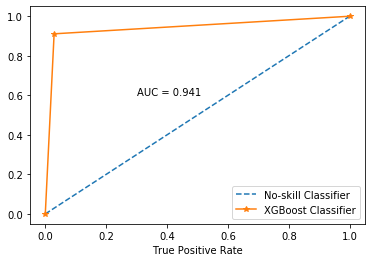

In [89]:
# Analysis of ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = "No-skill Classifier")
plt.plot(fpr, tpr, marker = '*', label = "XGBoost Classifier")
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.text(0.3, 0.6, "AUC = {}".format(np.round(AUC,3)))
plt.legend()

In [2]:
xgb_predictor.delete_endpoint()